In [1]:
import numpy as np 

In [2]:
A = np.array([[0,1,0],[0,0,1],[0,2,-1]])
C = np.array([[1,0,1]])
O = np.concatenate((C, np.matmul(C,A)), axis=0) 
r = np.linalg.matrix_rank(O)
print("rank = ",r)
r == A.shape[0]

rank =  2


False

In [3]:
A = np.array([[-1,0],[1,-0.5]])
C = np.array([[1,1],[0,-1]])
O = np.concatenate((C, np.matmul(C,A)), axis=0) 
r = np.linalg.matrix_rank(O)
print("rank = ",r)
r == A.shape[0]

rank =  2


True

In [4]:
import control

In [5]:
O

array([[ 1. ,  1. ],
       [ 0. , -1. ],
       [ 0. , -0.5],
       [-1. ,  0.5]])

In [6]:
control.obsv(A, C)

array([[ 1. ,  1. ],
       [ 0. , -1. ],
       [ 0. , -0.5],
       [-1. ,  0.5]])

In [7]:
A =  np.array([[2,1],[3,4]])
c = np.array([[10,13]])
e = np.array([[8],[7]])

y = np.matmul(np.matmul(c,A),e)
y

array([[906]])

In [8]:
A*y

array([[1812,  906],
       [2718, 3624]])

In [9]:
np.matmul(e,c)

array([[ 80, 104],
       [ 70,  91]])

# Finite difference formulas

11


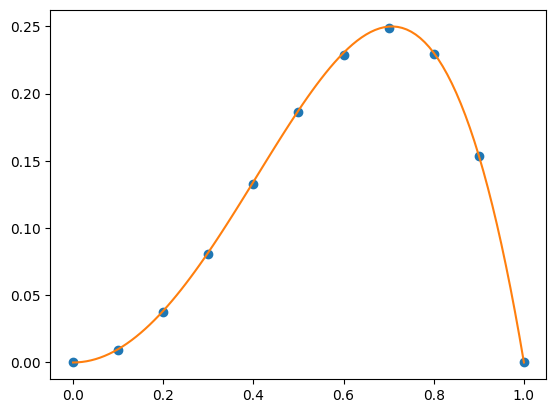

In [10]:
import numpy as np
import matplotlib.pyplot as plt
n = 11
A = np.zeros((n, n))


for i in range(2, n-2):
    A[i, i-2] = -0.5
    A[i, i-1] = 1
    A[i, i] = 0
    A[i, i+1] = -1
    A[i, i+2] = 0.5

    
A[0,0] = 1

A[1,1] = 0
A[1,2] = 9-5/8
A[1,3] = -12
A[1,4] = 7
A[1,5] = -3/2

A[n-2,n-6] = 3/2
A[n-2,n-5] = -7
A[n-2,n-4] = 12
A[n-2,n-3] = -9
A[n-2,n-2] = 5/2

A[n-1,n-1] = 1

print(np.linalg.matrix_rank(A))


h = 1 / (n-1)
x = np.linspace(0, 1, n)
b = -24*x
b[0] = 0
b[n-1] = 0
y = np.linalg.solve(A/h**3, b)
plt.plot(x,y,'o')
x = np.linspace(0, 1, 101)
plt.plot(x,x**2*(1-x**2))


In [11]:
# Now say we didnt know 
n = 101
A = np.zeros((n, n))


for i in range(2, n-2):
    A[i, i-2] = -0.5
    A[i, i-1] = 1
    A[i, i] = 0
    A[i, i+1] = -1
    A[i, i+2] = 0.5

    
constraint_matrix = np.zeros((3,n))
constraint_matrix[0,0] = 1

constraint_matrix[1,0] = -3/2
constraint_matrix[1,1] = 2
constraint_matrix[1,2] = -0.5

constraint_matrix[2,0] = 2
constraint_matrix[2,1] = -5
constraint_matrix[2,2] = 4
constraint_matrix[2,3] = -1


A[0,0] = -5/2
A[0,1]= 9
A[0,2]= -12
A[0,3]= 7
A[0,4]= -3/2

A[1,1] = -5/2
A[1,2]= 9
A[1,3]= -12
A[1,4]= 7
A[1,5]=-3/2


A[n-2,n-6] = 3/2
A[n-2,n-5] = -7
A[n-2,n-4] = 12
A[n-2,n-3] = -9
A[n-2,n-2] = 5/2

A[n-1,n-5] = 3/2
A[n-1,n-4] = -7
A[n-1,n-3] = 12
A[n-1,n-2] = -9
A[n-1,n-1] = 5/2

h = 1 / (n-1)
x = np.linspace(0, 1, n)
A_eq = np.vstack((constraint_matrix,A/h**3))


print(np.linalg.matrix_rank(A_eq[0:n,:]))

100


In [12]:

alpha = 4
beta = 2

b = np.zeros((n+3,1))
b[0,0] = 0 
b[1,0] = 0
b[2,0] = alpha*2*h**2
b[3:n+4,0] = -beta*24*x


C:\Users\Ric Porteous\AppData\Local\Temp\ipykernel_39100\4172802940.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  y = np.linalg.lstsq(A_eq, b, rcond='warn')


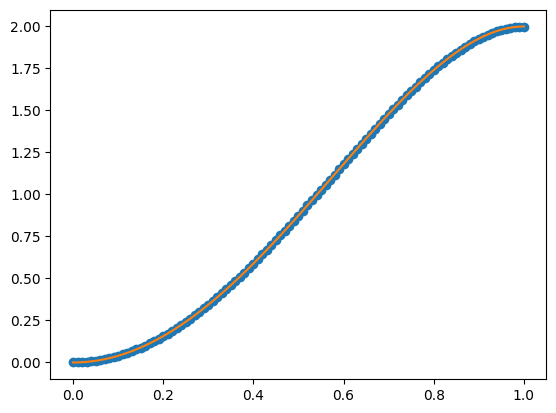

In [13]:
y = np.linalg.lstsq(A_eq, b, rcond='warn')
plt.plot(x,y[0],'o')
x = np.linspace(0, 1, 101)
plt.plot(x,x**2*(alpha-beta*x**2))

In [14]:
A

array([[ -2.5,   9. , -12. , ...,   0. ,   0. ,   0. ],
       [  0. ,  -2.5,   9. , ...,   0. ,   0. ,   0. ],
       [ -0.5,   1. ,   0. , ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,  -1. ,   0.5],
       [  0. ,   0. ,   0. , ...,  -9. ,   2.5,   0. ],
       [  0. ,   0. ,   0. , ...,  12. ,  -9. ,   2.5]])

In [15]:
b

array([[ 0.000e+00],
       [ 0.000e+00],
       [ 8.000e-04],
       [-0.000e+00],
       [-4.800e-01],
       [-9.600e-01],
       [-1.440e+00],
       [-1.920e+00],
       [-2.400e+00],
       [-2.880e+00],
       [-3.360e+00],
       [-3.840e+00],
       [-4.320e+00],
       [-4.800e+00],
       [-5.280e+00],
       [-5.760e+00],
       [-6.240e+00],
       [-6.720e+00],
       [-7.200e+00],
       [-7.680e+00],
       [-8.160e+00],
       [-8.640e+00],
       [-9.120e+00],
       [-9.600e+00],
       [-1.008e+01],
       [-1.056e+01],
       [-1.104e+01],
       [-1.152e+01],
       [-1.200e+01],
       [-1.248e+01],
       [-1.296e+01],
       [-1.344e+01],
       [-1.392e+01],
       [-1.440e+01],
       [-1.488e+01],
       [-1.536e+01],
       [-1.584e+01],
       [-1.632e+01],
       [-1.680e+01],
       [-1.728e+01],
       [-1.776e+01],
       [-1.824e+01],
       [-1.872e+01],
       [-1.920e+01],
       [-1.968e+01],
       [-2.016e+01],
       [-2.064e+01],
       [-2.11

In [16]:


print(np.linalg.matrix_rank(A[0:n-1,0:n-1]))

98


100


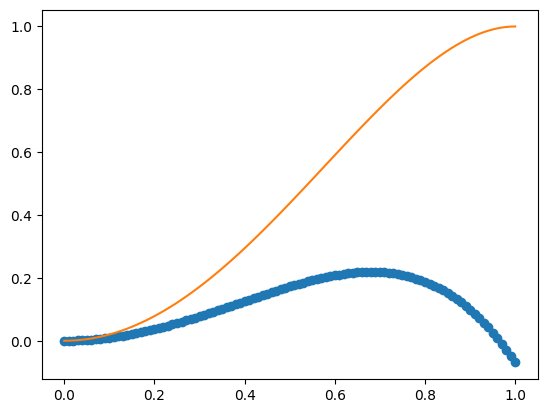

In [17]:
# Now without the constraint matrix
n = 101
A = np.zeros((n, n))


for i in range(2, n-2):
    A[i, i-2] = -0.5
    A[i, i-1] = 1
    A[i, i] = 0
    A[i, i+1] = -1
    A[i, i+2] = 0.5


A[0,0] = 1
A[1,1] = 1

A[2,0] = 0
A[2,1] = 0



A[n-2,n-6] = 3/2
A[n-2,n-5] = -7
A[n-2,n-4] = 12
A[n-2,n-3] = -9
A[n-2,n-2] = 5/2

A[n-1,n-5] = 3/2
A[n-1,n-4] = -7
A[n-1,n-3] = 12
A[n-1,n-2] = -9
A[n-1,n-1] = 5/2

h = 1 / (n-1)
x = np.linspace(0, 1, n)


alpha = 2
beta = 1


print(np.linalg.matrix_rank(A))

b = np.zeros((n,1))

b[0,0] = 0 
b[1,0] = alpha*h**2
b[2,0] = -24*beta*x[2]*h**3 - alpha*h**2
b[3:n,0] = -24*beta*x[3:n]*h**3

y = np.linalg.solve(A, b)
plt.plot(x,y,'o')
x = np.linspace(0, 1, 101)
plt.plot(x,x**2*(alpha-beta*x**2))

In [18]:
# Now without the constraint matrix
n = 101
A = np.zeros((n, n))


for i in range(4, n):
    A[i, i-4] = -0.5
    A[i, i-3] = 1
    A[i, i] = 0
    A[i, i-1] = -1
    A[i, i] = 0.5


A[0,0] = 1

A[1,0] = -3/2
A[1,1] = 2
A[1,2] = -0.5

A[2,0] = 1
A[2,1] = -2
A[2,2] = 1

A[3,1] = -5/2
A[3,2] = 9
A[3,3] = -12
A[3,4] = 7
A[3,5] = -3/2



x = np.linspace(0, 1, n)
h = x[1] - x[0]

alpha = 2
beta = 1

A_eq = A

print(np.linalg.matrix_rank(A_eq))

print(A_eq.shape)
print(A)

101
(101, 101)
[[ 1.   0.   0.  ...  0.   0.   0. ]
 [-1.5  2.  -0.5 ...  0.   0.   0. ]
 [ 1.  -2.   1.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.5  0.   0. ]
 [ 0.   0.   0.  ... -1.   0.5  0. ]
 [ 0.   0.   0.  ...  0.  -1.   0.5]]


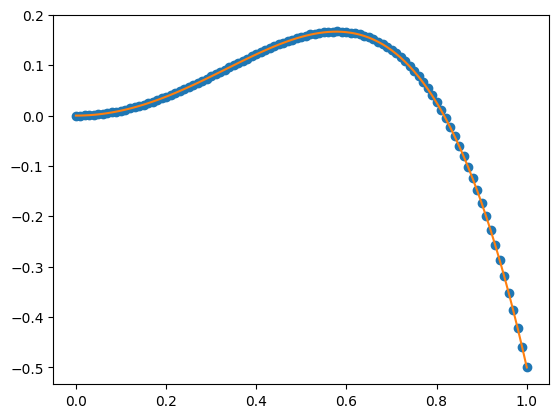

In [19]:

alpha = 1
beta = 1.5

b = np.zeros((n,1))

b[0,0] = 0 
b[1,0] = 0
b[2,0] = alpha*2*h**2
b[3:n-1,0] = -24*beta*x[1:n-3]*h**3

y = np.linalg.solve(A_eq, b)
plt.plot(x,y,'o')

x = np.linspace(0, 1, 101)
plt.plot(x,x**2*(alpha-beta*x**2))

In [74]:
# Now without the constraint matrix and replacing the double derivative constraint with an integral constraint
n = 101
A = np.zeros((n, n))


for i in range(4, n):
    A[i, i-4] = -0.5
    A[i, i-3] = 1
    A[i, i-2] = 0
    A[i, i-1] = -1
    A[i, i] = 0.5

# First value constraint
A[0,0] = 1

# Constraint on the first derivative
A[1,0] = -3/2
A[1,1] = 2
A[1,2] = -0.5

# Constraint on the second derivatice
#A[2,0] = 1
#A[2,1] = -2
#A[2,2] = 1

A[2,:] = 1

# Constraint on the third derivatice
A[3,1] = -5/2
A[3,2] = 9
A[3,3] = -12
A[3,4] = 7
A[3,5] = -3/2



x = np.linspace(0, 1, n)
h = x[1] - x[0]

alpha = 2
beta = 1


print(np.linalg.matrix_rank(A))

print(A)

101
[[ 1.   0.   0.  ...  0.   0.   0. ]
 [-1.5  2.  -0.5 ...  0.   0.   0. ]
 [ 1.   1.   1.  ...  1.   1.   1. ]
 ...
 [ 0.   0.   0.  ...  0.5  0.   0. ]
 [ 0.   0.   0.  ... -1.   0.5  0. ]
 [ 0.   0.   0.  ...  0.  -1.   0.5]]


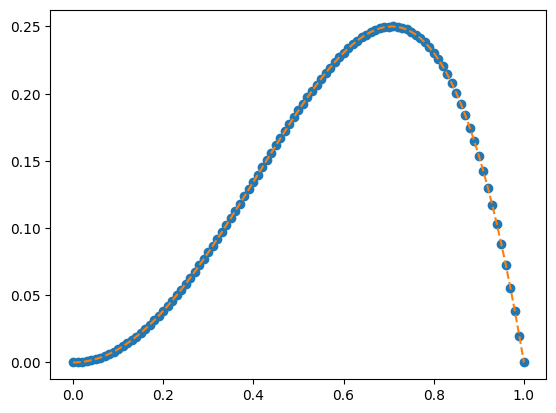

In [80]:
alpha = 1
beta = 1

b = np.zeros((n,1))

b[0,0] = 0 
b[1,0] = 0
b[2,0] = (2/15)/h
b[3:n-1,0] = -24*beta*x[1:n-3]*h**3

y = np.linalg.solve(A, b)
plt.plot(x,y,'o')

x = np.linspace(0, 1, 101)
plt.plot(x,x**2*(1-1*x**2),'--')

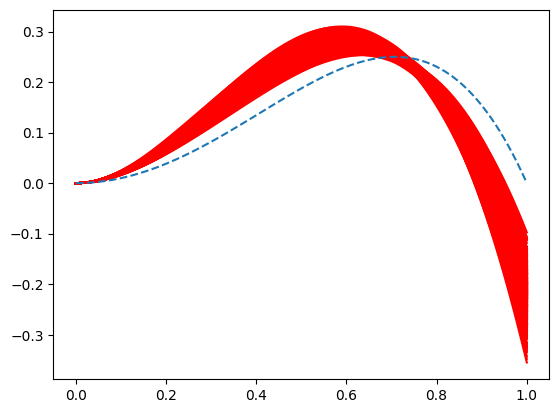

In [87]:
alpha = 1
beta = 1

b = np.zeros((n,1))

b[0,0] = 0 
b[1,0] = 0
b[2,0] = (2/15)/h

for i in range(1000):
    b[3:n-1,0] = -np.random.uniform(0,30,len(x[1:n-3]))*h**3
    y = np.linalg.solve(A, b)
    plt.plot(x,y,'r-')
x = np.linspace(0, 1, 101)
plt.plot(x,x**2*(1-1*x**2),'--')



In [55]:
# Now without the constraint matrix and directly trying to constrain the output
n = 11
A = np.zeros((n, n))


for i in range(4, n):
    A[i, i-1] = 1


# First value constraint
A[0,0] = 1

# Constraint on the first derivative
A[1,0] = -3/2
A[1,1] = 2
A[1,2] = -0.5

# Constraint on the integral
A[2,:] = 1

# Constraint on the third derivatice
A[3,2] = 1


print(np.linalg.matrix_rank(A))

print(A)


11
[[ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0. ]]


In [33]:
2/15

0.13333333333333333

In [115]:
n = 11
A = np.zeros((n, n))
for i in range(0, n-1):
    A[i, i] = 1

    
A[n-1,1:n] = 1
print(np.linalg.matrix_rank(A))

11


In [116]:
A

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [147]:
s = np.linspace(0,1,101)
x1 = -0.32*s**2 + 0.48*s
x2 = s**2 *(1.0 - s**2)
error = (x1-x2)/x2

C:\Users\Ric Porteous\AppData\Local\Temp\ipykernel_39100\2464006583.py:4: RuntimeWarning: divide by zero encountered in divide
  error = (x1-x2)/x2
C:\Users\Ric Porteous\AppData\Local\Temp\ipykernel_39100\2464006583.py:4: RuntimeWarning: invalid value encountered in divide
  error = (x1-x2)/x2


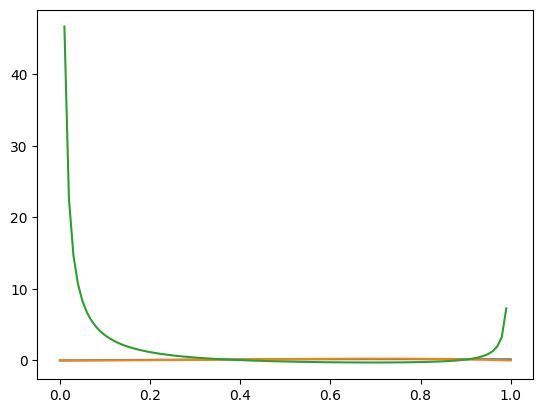

In [148]:
plt.plot(s,x1)
plt.plot(s,x2)
plt.plot(s,error)

In [142]:
sum(error)

0.08113329999999883

In [138]:
2/15/(-0.44/3+0.66/2) * 0.66

0.48

In [144]:
-0.44/3

-0.14666666666666667